In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../Complexes_0413_2022.csv")
data=data.replace("None",np.nan)
data=data[data[ "subunits(UniProt IDs)"]!=np.nan]
data=data[[len(x.split(';'))>=5 for x in data[ "subunits(UniProt IDs)"] ]]
data=data.reset_index(drop=True)
data.head(2)

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,PubMed ID,Complex comment,Disease comment,Subunits comment,SWISSPROT organism,subunits(Protein name),subunits(Gene name),subunits(Gene name syn)
0,38,20S proteasome,Mouse,proteasome,NaN,O09061;O55234;O70435;P49722;P70195;P99026;Q606...,19170;19173;19167;19166;19177;19172;19175;2644...,MI:0019- coimmunoprecipitation,GO:0016485;GO:0043161;GO:0006511;GO:0006950;GO...,protein processing;proteasome-mediated ubiquit...,14.07.11;14.13.01.01;32.01;70.03;70.10,protein processing (proteolytic);proteasomal d...,10436176,The proteasome is an essential component of th...,NaN,NaN,Mus musculus (Mouse);Mus musculus (Mouse);Mus ...,Proteasome subunit beta type-1;Proteasome subu...,Psmb1;Psmb5;Psma3;Psma2;Psmb7;Psmb4;Psmb6;Psma...,None;;None;Lmpc3;Mmc14;Lmp3;Lmp19;None;None;No...
1,39,Immunoproteasome,Mouse,20S immunoproteasome; proteasome,NaN,O09061;O35955;O70435;P28063;P28076;P49722;P990...,19170;19171;19167;16913;16912;19166;19172;2644...,MI:0019-coimmunoprecipitation,GO:0016485;GO:0043161;GO:0006511;GO:0006950;GO...,protein processing;proteasome-mediated ubiquit...,14.07.11;14.13.01.01;32.01;36.25.16.03.05;70.0...,protein processing (proteolytic);proteasomal d...,10436176,The proteasome is an essential component of th...,NaN,NaN,Mus musculus (Mouse);Mus musculus (Mouse);Mus ...,Proteasome subunit beta type-1;Proteasome subu...,Psmb1;Psmb10;Psma3;Psmb8;Psmb9;Psma2;Psmb4;Psm...,None;Lmp10 Mecl1;None;Lmp7 Mc13;Lmp2 Ring12;Lm...


In [3]:
# utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst"]]
utmb_data= pd.read_csv("Analyzed_Proteins_and_Their_Rates.csv")[["Proteins"," RateConstant"]]
utmb_data.columns=["protiens","rateconst"]

utmb_list= pd.read_csv("Protein_List.utmb.0518_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["protiens"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names"]]
utmb_data=utmb_data.reset_index(drop=True)
utmb_data.head(2)

,Entry,Entry name,rateconst,Gene names
0,Q9CQV8,1433B_MOUSE,0.302335,Ywhab
1,P62259,1433E_MOUSE,0.291690,Ywhae


In [4]:
#search
found_list={}

for i in range(utmb_data.shape[0]): 
    
    for j in range(data.shape[0]):
        
        temp=(data[ "subunits(UniProt IDs)"][j]).split(';')
        temp=[x.strip() for x in temp]
        
        if((utmb_data["Entry"][i]).strip() in temp):
            
            if( (data["ComplexID"][j]) in found_list.keys()):
                
                found_list[data["ComplexID"][j]]["protiens"].append(utmb_data["Entry"][i])
                found_list[data["ComplexID"][j]]["count"]+=1
                found_list[data["ComplexID"][j]]["protiens_name"].append(utmb_data["Entry name"][i])
                found_list[data["ComplexID"][j]]["k"].append(float(utmb_data["rateconst"][i]))
                
            else:
                found_list[(data["ComplexID"][j])]={"name":data["ComplexName"][j],
                                                    "count":1,
                                                  "protiens":[utmb_data["Entry"][i]],
                                                  "protiens_name":[utmb_data["Entry name"][i]],
                                                  "k":[ float(utmb_data["rateconst"][i])]}
#             found_list.append([data["ComplexName"][j],data["ComplexID"][j],utmb_data["Entry"][i],utmb_data["rateconst"][i]
#                                ])
        

In [5]:
len(found_list.keys())

53

In [6]:
found_list

{5936: {'name': 'Ksr1-CK2-MEK-14-3-3 complex, PDGF treated',
  'count': 4,
  'protiens': ['P63101', 'Q60737', 'P67871', 'P31938'],
  'protiens_name': ['1433Z_MOUSE',
   'CSK21_MOUSE',
   'CSK2B_MOUSE',
   'MP2K1_MOUSE'],
  'k': [0.332051, 0.756679, 0.151084, 0.386116]},
 6366: {'name': 'MCC complex (p85alpha, p110alpha, Akt,14-3-3theta, beta-catenin)',
  'count': 2,
  'protiens': ['P63101', 'Q02248'],
  'protiens_name': ['1433Z_MOUSE', 'CTNB1_MOUSE'],
  'k': [0.332051, 0.419599]},
 384: {'name': 'Caveolar macromolecular signaling complex',
  'count': 1,
  'protiens': ['Q76MZ3'],
  'protiens_name': ['2AAA_MOUSE'],
  'k': [0.370387]},
 385: {'name': 'Caveolar macromolecular signaling complex, using anti-Cav-3',
  'count': 1,
  'protiens': ['Q76MZ3'],
  'protiens_name': ['2AAA_MOUSE'],
  'k': [0.370387]},
 6887: {'name': 'Ragulator-AXIN/LKB1-AMPK complex',
  'count': 4,
  'protiens': ['Q9R078', 'O54950', 'Q5EG47', 'Q9CQ22'],
  'protiens_name': ['AAKB1_MOUSE',
   'AAKG1_MOUSE',
   'AAPK1_M

In [7]:
Filtered_vals = dict()
for new_ke, new_val in found_list.items():
    
    if len(new_val["protiens"])>=5:
        Filtered_vals[new_ke] = new_val

In [30]:
df=pd.DataFrame(Filtered_vals)
df=df.transpose()
df=df.reset_index(drop=True)
df=df.drop([0,5,10,15,16,17])
df=df.reset_index(drop=True)
df.head(20)

,name,count,protiens,protiens_name,k
0,"Respiratory chain complex I, mitochondrial",36,"[Q9CR21, O35683, Q9CQ75, Q9CQ91, Q62425, Q9CPP...","[ACPM_MOUSE, NDUA1_MOUSE, NDUA2_MOUSE, NDUA3_M...","[0.079681, 0.392418, 0.090538, 0.175473, 0.494..."
1,Metallothionein-3 complex,5,"[P60710, O08553, Q61696, P11499, Q04447]","[ACTB_MOUSE, DPYL2_MOUSE, HS71A_MOUSE, HS90B_M...","[0.215541, 0.073214, 0.323178, 0.515521, 0.108..."
2,Coatomer-Arf1 complex,8,"[P84078, Q8CIE6, O55029, Q9JIF7, Q5XJY5, O8907...","[ARF1_MOUSE, COPA_MOUSE, COPB2_MOUSE, COPB_MOU...","[0.565634, 0.436438, 0.222017, 0.450051, 0.676..."
3,"(ER)-localized multiprotein complex, Ig heavy ...",9,"[P20029, Q99KV1, P08113, Q9JKR6, P09103, P0800...","[BIP_MOUSE, DJB11_MOUSE, ENPL_MOUSE, HYOU1_MOU...","[0.440944, 0.319636, 0.377622, 0.399982, 0.468..."
4,Coatomer complex,7,"[Q8CIE6, O55029, Q9JIF7, Q5XJY5, O89079, Q9QZE...","[COPA_MOUSE, COPB2_MOUSE, COPB_MOUSE, COPD_MOU...","[0.436438, 0.222017, 0.450051, 0.676223, 0.423..."
5,"Cytochrome c oxidase, mitochondrial",8,"[P00405, P00416, P19783, P12787, P19536, Q9CPQ...","[COX2_MOUSE, COX3_MOUSE, COX41_MOUSE, COX5A_MO...","[0.063687, 0.153159, 0.150738, 0.240034, 0.119..."
6,"COP9 signalosome complex (Gps1, Cops1, Cops2, ...",7,"[Q99LD4, P61202, O88543, O88544, O35864, O8854...","[CSN1_MOUSE, CSN2_MOUSE, CSN3_MOUSE, CSN4_MOUS...","[0.356606, 0.243732, 0.325786, 0.281195, 0.622..."
7,"Cytochrome bc1-complex, mitochondrial",8,"[Q9D0M3, Q9CZ13, Q9DB77, P99028, Q9D855, Q9CQ6...","[CY1_MOUSE, QCR1_MOUSE, QCR2_MOUSE, QCR6_MOUSE...","[0.122814, 0.154394, 0.162205, 0.159866, 0.300..."
8,Parvulin-associated pre-rRNP complex,32,"[Q9JIK5, Q61656, Q9D8N0, P35550, P11276, Q7TPV...","[DDX21_MOUSE, DDX5_MOUSE, EF1G_MOUSE, FBRL_MOU...","[0.511108, 2.078541, 0.104136, 0.213212, 0.922..."
9,c-Src immune complex,6,"[P63085, Q63844, Q8VI36, P68369, P05213, Q64727]","[MK01_MOUSE, MK03_MOUSE, PAXI_MOUSE, TBA1A_MOU...","[0.131553, 0.342024, 0.331349, 0.240626, 0.167..."


In [31]:

# df["k_sd"]=0
# df["k_median"]=0
# df["k_mean_val"]=0

# for i in range(df.shape[0]):
#     temp= np.array( df.k[i]) 
    
#     df.k_mean_val[i]= np.mean(temp)
#     df.k_median[i]= np.median(temp )
#     df.k_sd[i]= np.std( temp)
    
# df[["name","k","k_sd","k_median","protiens_name","protiens"]]

In [32]:
complex_name=[]
complex_data=[]

for i in range(df.shape[0]):
    if(df.name[i] not in complex_name):
        complex_name.append(df.name[i])
        complex_data.append(df.k[i])

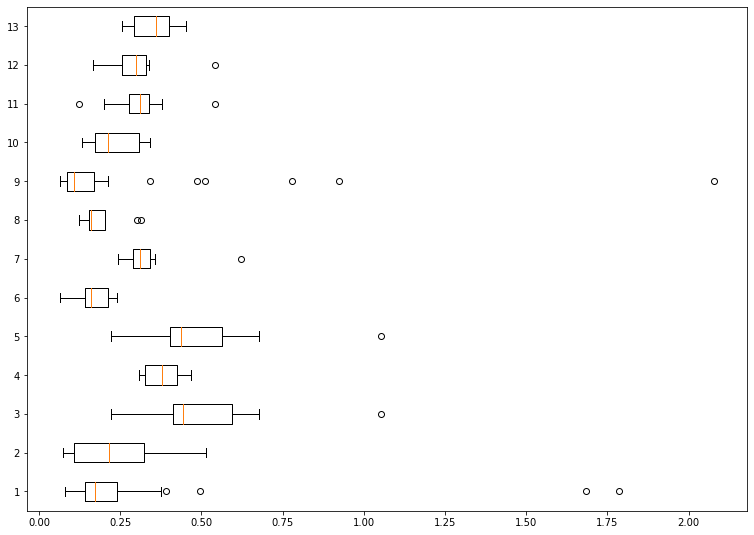

In [55]:

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([1, 1, 1, 1])

# Creating plot
bp = ax.boxplot(complex_data,vert =False)
plt.yticks(range(1,len(complex_name)+1), complex_name) 
 
# show plot
plt.show()

In [50]:
compd=pd.DataFrame()

for i in range(df.shape[0]):
    
    perc= pd.DataFrame()
    perc["k"]=df['k'][i]
    perc["name"]=df['name'][i] + f" ({df['count'][i]})"
    compd=pd.concat([compd,perc])

Text(0, 0.5, '')

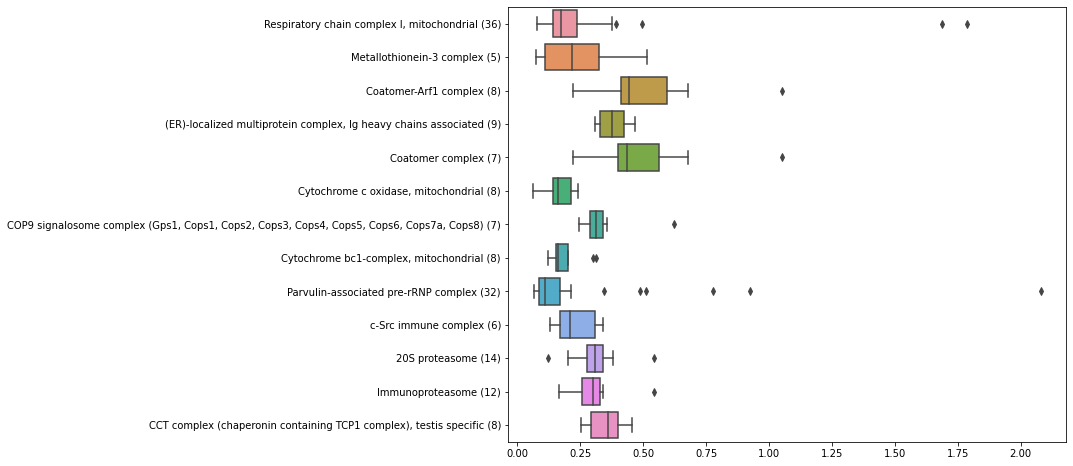

In [51]:
# fig = plt.gcf()
fig, ax = plt.subplots(1)

# Change seaborn plot size
fig.set_size_inches(10, 8)

sns.boxplot(x="k", y="name", data=compd,orient ='h')
# sns.swarmplot(x="k", y="name", data=compd,orient='h', color=".25")
plt.xlabel('')
plt.ylabel('')
# sns.swarmplot(x="name", y="k", data=compd, color=".25")

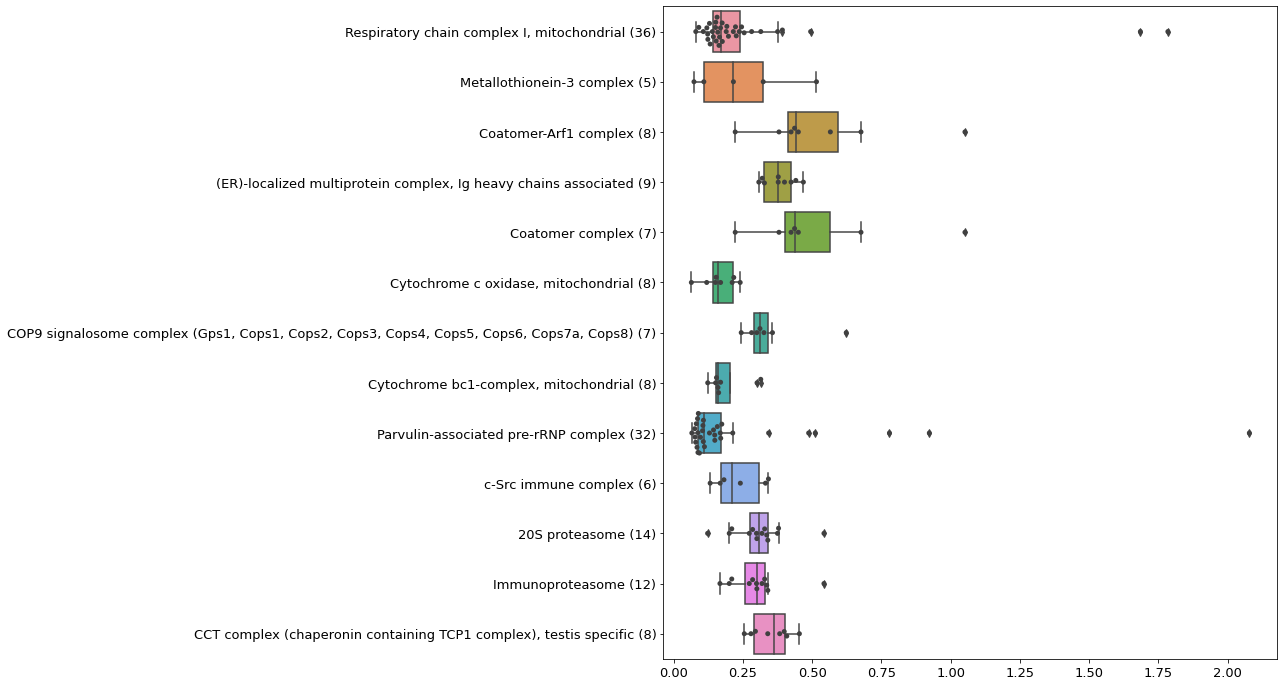

In [60]:
import textwrap
# fig = plt.gcf()

fig, ax = plt.subplots(1)

# Change seaborn plot size
fig.set_size_inches(11, 12)
# sns.set(font_scale = 1)
sns.boxplot(x="k", y="name", data=compd,orient ='h')
sns.swarmplot(x="k", y="name", data=compd,orient='h', color=".25")
plt.xlabel('')
plt.ylabel('')
plt.legend([],[], frameon=False)
# sns.swarmplot(x="name", y="k", data=compd, color=".25")

# plt.xlabel('', fontsize=16);
# plt.ylabel('', fontsize=16);
# plt.title(' Data', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=13)
# ax.set_yticklabels([textwrap.fill(e, 40) for e in complex_name])
plt.show()

In [53]:
import os
print(os.getcwd())

C:\Workplace\Python\d2omeplusAnalysis\d2omePlusAnalysis\Complex_analysis


In [16]:
# x=list(df[df.name=='Drosha complex']['protiens_name'])
# x

In [17]:
# x=list(df[df.name=='Drosha complex']['k'])
# x

In [18]:
len(t)

NameError: name 't' is not defined